### Importing libraries and the data

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import Imputer 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

file = "C:/Users/Jonathan/OneDrive/Lacuna-Data/Data_Science_Stuff/Portfolio/MLisLife/Github Home/ML_Tests/Kaggle House Prices Advanced Regression Techniques/Housing Data"
import os
# print(os.listdir("../input"))
train_df = pd.read_csv(file+"/train.csv")
test_df = pd.read_csv(file+"/test.csv")

print("Training data size:{}".format(train_df.shape))
print("Validation data size:{}".format(test_df.shape))
# Any results you write to the current directory are saved as output.

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

Training data size:(1460, 81)
Validation data size:(1459, 80)


### Pre-processing the data for Machine Learning

In this section:
1. Visualise the data for each column
2. Check for missing data
3. Normalise the data - StandardScaler, MinMaxScaler


In [3]:
# Pick columns that have numerics
# data = train_df.select_dtypes(include=[np.number]).interpolate().dropna()
# data.columns

# Return everything as a Numeric
# pd.get_dummies(train_df)


In [4]:
# Overview of the data
# Using the describe method for the overview
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


The heighest SalePrice is 755,000
The minmum SalePrice is 34,900
Average SalePrice is 129,975

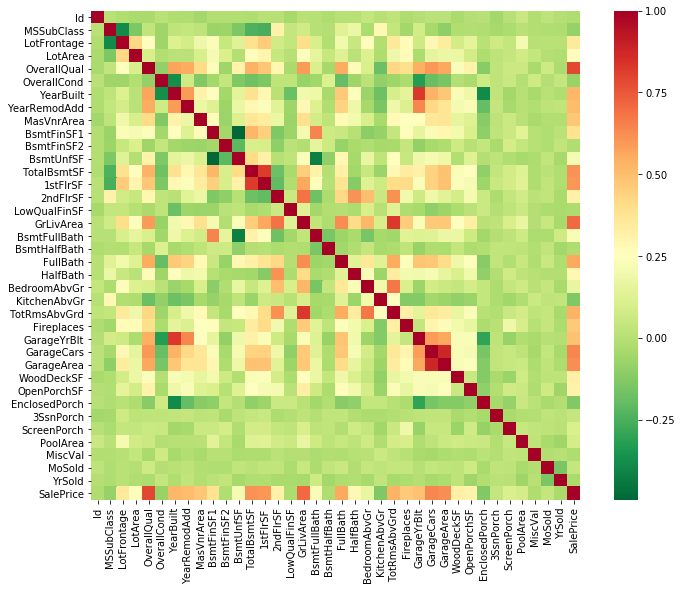

In [5]:
# Visualising the data
# Using the correlation heatmap matrix to understand how the features are related
corr_matrix = train_df.corr() 
f,ax = plt.subplots(figsize= (12,9))
sns.heatmap(corr_matrix, vmax = 1, square = True, cmap = "RdYlGn_r")

The closer the heatmap is to 1, the more directly correlated the columns are which could point to multicollinearity. In multicollinearity the size of one feature directly affects the other. e.g. ***"1stFlrSf"(First Floor square feet)*** and ***"TotalBsmtSF"(Total square feet of basement area)*** which would be expected

Interesting to note is that an ***"EnclosedPorch"(Enclosed porch area in square feet)*** is inversily correlated to the "Saleprice" while more ***"GarageCars"(Size of garage in car capacity)*** lead to an increase. 

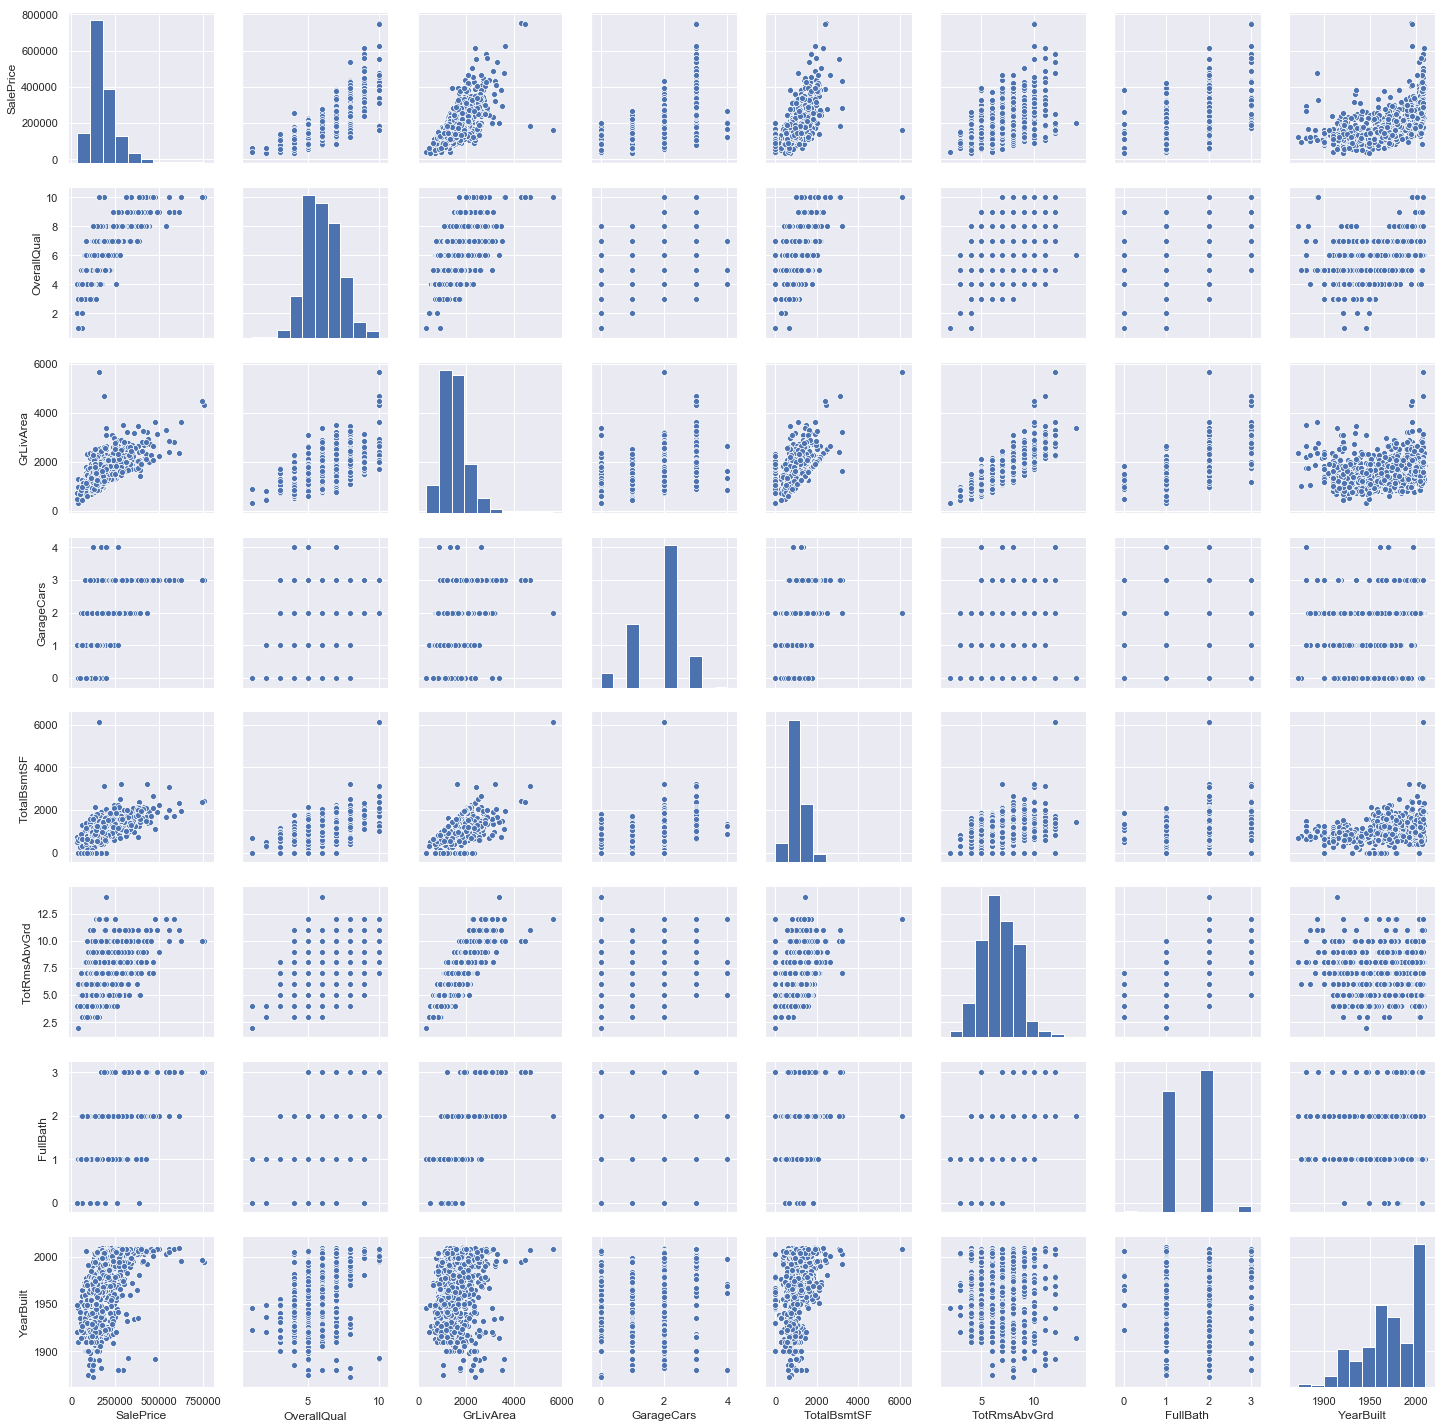

In [6]:
# Visulaising with Scatter plots
sns.set()
columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'TotRmsAbvGrd', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[columns], height = 2.5)
plt.show()

From the plots above, we get a better understanding of some of the main features on how they are related to each other and how they are related to the sales price. 
Focusing on the relationship to the salesprice, 
1. Salesprice histogram shows the distribution of the sales price. One notices it is skewed towards the left and we would thus need to normalise the sales price
2. The overall quality of the houses is directly related to the price. the higher the quality, the higher the price
3. The larger the General living area, the higher the price, however there are some anomalies. Factoring in the correlation heatmap visualisation, it is approximately 0.7
4. The higher the Garage capacity, the higher the price, however beyond 3 cars, the Sale price seems to drop. Correlation is approximately 0.6
5. The Higher the size of the total basement, the higher the price with a few anomalies
6. The more the total rooms, the higher the price. However there are other factors to consider beyond 7 rooms, as the price doesn't necessarily increase. The correlation is approximately 0.6
7. The more the number of baths, the higher the price, however there are a few anomalies. the correlation is approximately 0.6
8. The more recent the house was built, the higher the price. However their exist a few houses that do not conform to the norm. some of the old vintage house tend to sell for higher prices, as much as approximately 500, 000



Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64


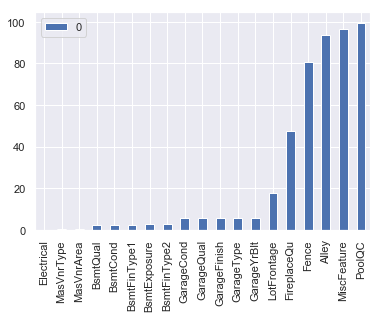

In [38]:
import matplotlib
# Checking for missing data
missing = train_df.isnull().sum()
missing = missing[missing > 0]
percent = ((train_df.isnull().sum())*100/train_df.isnull().count())
percent = percent[percent>0]
missing.sort_values(inplace=True)
percent.sort_values(inplace=True)
missing
print(percent)
percent = pd.DataFrame(percent)
percent.plot.bar()


In [8]:
# Dropping columns missing more than 15% of the data.
train_df_missing = train_df.copy()
train_df_missing = train_df_missing.drop((percent[percent> 15]).index,1)
print(train_df_missing.shape)
train_df_missing.columns

(1460, 75)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclos

In [9]:
dummy_data = pd.get_dummies(train_df_missing)
dummy_data = dummy_data.select_dtypes(include=[np.number]).interpolate().dropna()
dummy_data_= dummy_data.copy()
data_ = dummy_data_.drop(['SalePrice'], axis=1) # Drop SalePrice so it wont appear in the X_train later
# By droping SalePrice from X_train we ensure that the model is only seeing the target for the first time under y_train
# This ensures there is no over fitting, leading to poor results

# Transformation of data to improve performance and predicability
# Log transformation of data
dummy_data_['SalePrice'] = np.log(dummy_data_['SalePrice'])
dummy_data_['GrLivArea'] = np.log(dummy_data_['GrLivArea'])
data_['GrLivArea'] = np.log(data_['GrLivArea'])

print("Shape of data without Sale Price:{}".format(data_.shape))
print("Shape of data with Sale Price:{}".format(dummy_data_.shape))

Shape of data without Sale Price:(1460, 270)
Shape of data with Sale Price:(1460, 271)


In [10]:
# # Filling columns that have less than 15% data missing using the sklearn simpleimputer
# imputed_train = data_.copy()

# cols_with_missing = (col for col in imputed_train.columns 
#                                  if imputed_train[col].isnull().any())
# for col in cols_with_missing:
#     imputed_train[col + '_was_missing'] = imputed_train[col].isnull()

# # Imputation
# my_imputer = SimpleImputer()
# imputed_train = my_imputer.fit_transform(imputed_train)

# imputed_train
# # train_df_imputed = SimpleImputer().fit_transform(data)
# # train_df_imputed

Plot of SalePrice data before transformation


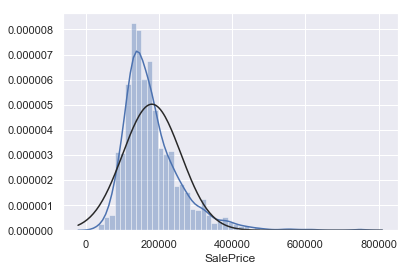

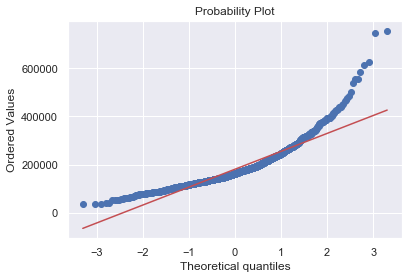

In [11]:
#histogram and normal probability plot
from scipy import stats
from scipy.stats import norm
print("Plot of SalePrice data before transformation")
sns.distplot(dummy_data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(dummy_data['SalePrice'], plot=plt)

Plot of SalePrice data after transformation


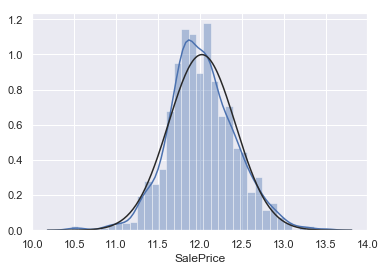

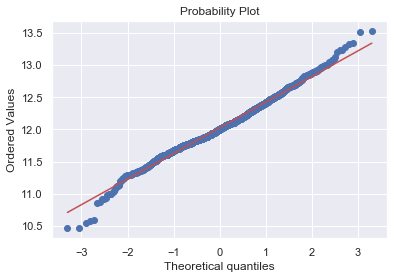

In [12]:
print ("Plot of SalePrice data after transformation")
sns.distplot(dummy_data_['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(dummy_data_['SalePrice'], plot=plt)

### Preparing the Validation dataset.

This will be used to validate the model after the training and initial tests


TotalBsmtSF      0.068540
GarageArea       0.068540
GarageCars       0.068540
KitchenQual      0.068540
BsmtUnfSF        0.068540
BsmtFinSF2       0.068540
BsmtFinSF1       0.068540
SaleType         0.068540
Exterior1st      0.068540
Exterior2nd      0.068540
Functional       0.137080
Utilities        0.137080
BsmtHalfBath     0.137080
BsmtFullBath     0.137080
MSZoning         0.274160
MasVnrArea       1.028101
MasVnrType       1.096642
BsmtFinType2     2.878684
BsmtFinType1     2.878684
BsmtQual         3.015764
BsmtExposure     3.015764
BsmtCond         3.084304
GarageType       5.209047
GarageFinish     5.346127
GarageQual       5.346127
GarageCond       5.346127
GarageYrBlt      5.346127
LotFrontage     15.558602
FireplaceQu     50.034270
Fence           80.123372
Alley           92.666210
MiscFeature     96.504455
PoolQC          99.794380
dtype: float64


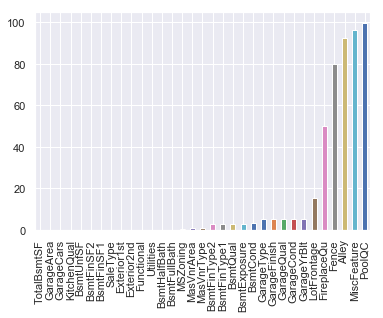

In [13]:
# Preprocessing the test data, removing missing elements, and predicting the results
test_df_ = test_df.copy()
# Checking for missing data
tmissing = test_df_.isnull().sum()
tmissing = tmissing[tmissing > 0]
tpercent = ((test_df_.isnull().sum())*100/test_df_.isnull().count())
tpercent = tpercent[tpercent>0]
tmissing.sort_values(inplace=True)
tpercent.sort_values(inplace=True)
tmissing
print(tpercent)
tpercent.plot.bar()

# Dropping columns missing more than 15% of the data.

test_df_missing = test_df_.drop((tpercent[tpercent> 15]).index,1)

In [14]:
print("Size of training dataset after removing columns with more than 15% data missing is {}".format(train_df_missing.shape))
print("Size of validation dataset after removing columns with more than 15% data missing is {}".format(test_df_missing.shape))

Size of training dataset after removing columns with more than 15% data missing is (1460, 75)
Size of validation dataset after removing columns with more than 15% data missing is (1459, 74)


In [15]:
tdummy_data = pd.get_dummies(test_df_missing)
# tdummy_data.columns
# Return only columns with a dtype
tdata = tdummy_data.select_dtypes(include=[np.number]).interpolate().dropna()
tdata.shape

(1459, 254)

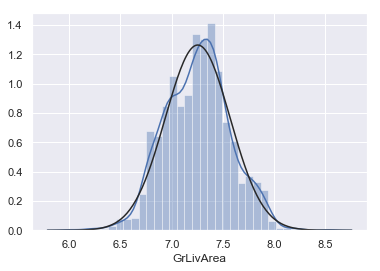

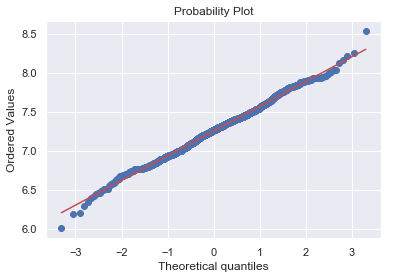

In [16]:
# Data transformation to remove the positive skewness in the data
#applying log transformation
tdata['GrLivArea'] = np.log(tdata['GrLivArea'])

#Plotting the transformed data
sns.distplot(tdata['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(tdata['GrLivArea'], plot=plt)

In [17]:
# Columns that will be used for both the training and validation data

train_col = list(data_.columns)
test_col = list(tdata.columns)
# col=[]
# for i in train_col:
#     if i in test_col:
#         col.append(i)

# col

tcol = [i for i in train_col if i in test_col]

TrainData = data_[tcol]
ValidationData = tdata[tcol]
print("Processed Training data size:{}".format(TrainData.shape))
print("Processed Validation data size:{}".format(ValidationData.shape))

Processed Training data size:(1460, 254)
Processed Validation data size:(1459, 254)


### Build a Model

In this section:
1. Train test split
2. Select the best linear or decision tree model
3.  Fit the model to the training dataset


In [18]:
from sklearn.model_selection import train_test_split
tsize = 0.3
X_train, X_test, y_train, y_test = train_test_split(TrainData, dummy_data_.SalePrice, test_size=tsize, random_state=42)

In [19]:
# Number of training features
n_samples, n_features = X_train.shape

# Print out `n_samples`
print("Total Training Samples {} of data are: {}".format((1 - tsize), n_samples))

# Print out `n_features`
print("Total features are: {}".format(n_features))

# # Inspect training targets `y_train`
# print("Total training targets {} of data are: {}".format((1 - tsize), len(y_train)))

# Size of test 
print("Total test samples {} of data: {}".format((tsize),X_test.shape[0]))

# Inspect testing targets `y_test`
print("Total testing targets {} of data are: {}".format((tsize), len(y_test)))

Total Training Samples 0.7 of data are: 1022
Total features are: 254
Total test samples 0.3 of data: 438
Total testing targets 0.3 of data are: 438


In [20]:
# Selecting the best regression model
# Using sklearn pipeline to facilitate selecting of the best performance model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor


In [21]:
pipeline = Pipeline([('normalizer', StandardScaler()), # Step 1 - Normalise the data
                     ('clf', LinearRegression(normalize=True)) # Step 2 - Classifier
                    ])
clfs = []
clfs.append(LinearRegression(normalize=True))
clfs.append(SGDRegressor(alpha = 3))
clfs.append(SVR())
clfs.append(DecisionTreeRegressor())
clfs.append(RandomForestRegressor())
clfs.append(GradientBoostingRegressor())
clfs.append(AdaBoostRegressor())


for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train, cv=3, return_train_score = True)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())

---------------------------------
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
-----------------------------------
fit_time  mean  0.06580050786336263
fit_time  std  0.0032846374023959186
score_time  mean  0.0020020008087158203
score_time  std  0.0014156291006748932
test_score  mean  -7.747554581698576e+20
test_score  std  5.362397187733252e+20
train_score  mean  0.9547666465260661
train_score  std  0.005046301950413622
---------------------------------
SGDRegressor(alpha=3, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)
-----------------------------------
fit_time  mean  0.016472816467285156
fit_time  std  0.004853300462535459
score_time  mean  0.0
score_time  std  0.0
test_score  mean  0.8002828931796615
test_score  std  0.02

**Validate Model Performance**

In this section:

1. Analyse the models performance


In [22]:
linearmodel = LinearRegression().fit(X_train,y_train)
y_pred = linearmodel.predict(X_test)

In [23]:
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))

Variance score: 0.89
Mean squared error: 0.02


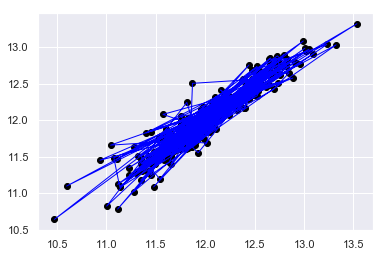

In [24]:
# Plot outputs
plt.scatter(y_test, y_pred,  color='black')
plt.plot(y_test, y_pred, color='blue', linewidth=1)

In [25]:
gbr = GradientBoostingRegressor().fit(X_train,y_train)
gbr_pred = gbr.predict(X_test)
print('Variance score: %.2f' % r2_score(y_test, gbr_pred))
print("Mean squared error: %.2f"% mean_squared_error(y_test, gbr_pred))

Variance score: 0.91
Mean squared error: 0.02


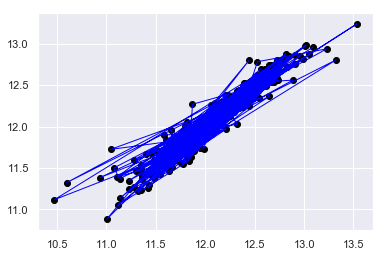

In [26]:
# Plot outputs
plt.scatter(y_test, gbr_pred,  color='black')
plt.plot(y_test, gbr_pred, color='blue', linewidth=1)

In [27]:
# Dataframe of Model 1 results
result = X_test.copy()
result['Log SalePrice Prediction'] = y_pred
result['SalePrice Prediction'] = np.exp(y_pred)
result['Log SalePrice'] = y_test
result['Real SalePrice'] = np.exp(y_test)
result_show = result[['Id','Log SalePrice','Log SalePrice Prediction','Real SalePrice','SalePrice Prediction']]
result_show.head()

,Id,Log SalePrice,Log SalePrice Prediction,Real SalePrice,SalePrice Prediction
892,893,11.947949,11.925733,154500.0,151105.485893
1105,1106,12.691580,12.758020,325000.0,347326.421201
413,414,11.652687,11.517449,115000.0,100453.336945
522,523,11.976659,12.176826,159000.0,194235.332503
1036,1037,12.661914,12.736576,315500.0,339957.675981


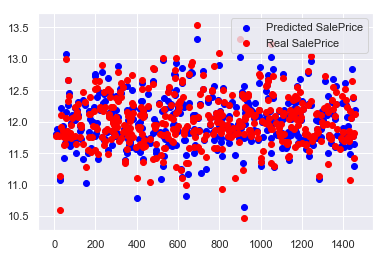

In [28]:
x = result.Id
j = plt.scatter(x, y_pred, color='blue')
k = plt.scatter(x, y_test, color ='red')
plt.legend((j,k),('Predicted SalePrice','Real SalePrice'), loc = 1)
plt.show()

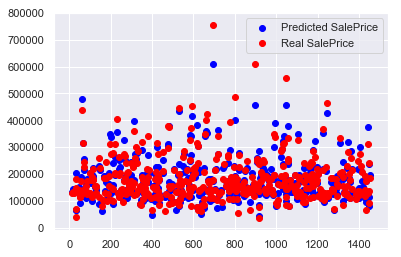

In [29]:
x = result.Id
j = plt.scatter(x, np.exp(y_pred), color='blue')
k = plt.scatter(x, np.exp(y_test), color ='red')
plt.legend((j,k),('Predicted SalePrice','Real SalePrice'), loc = 1)
plt.show()

In [30]:
# Based on the Scatter plot above, the model still needs tweaking to improve its performance

In [31]:
# Dataframe of Model 2 results
result2 = X_test.copy()
result2['Log SalePrice Prediction'] = gbr_pred
result2['SalePrice Prediction'] = np.exp(gbr_pred)
result2['Log SalePrice'] = y_test
result2['Real SalePrice'] = np.exp(y_test)
result2_show = result[['Id','Log SalePrice','Log SalePrice Prediction','Real SalePrice','SalePrice Prediction']]
result2_show.head()

,Id,Log SalePrice,Log SalePrice Prediction,Real SalePrice,SalePrice Prediction
892,893,11.947949,11.925733,154500.0,151105.485893
1105,1106,12.691580,12.758020,325000.0,347326.421201
413,414,11.652687,11.517449,115000.0,100453.336945
522,523,11.976659,12.176826,159000.0,194235.332503
1036,1037,12.661914,12.736576,315500.0,339957.675981


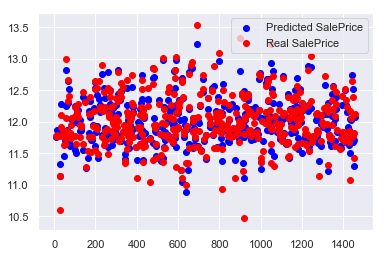

In [32]:
x = result2.Id
j = plt.scatter(x, gbr_pred, color='blue')
k = plt.scatter(x, y_test, color ='red')
plt.legend((j,k),('Predicted SalePrice','Real SalePrice'), loc = 1)
plt.show()

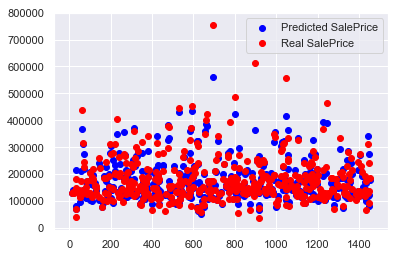

In [33]:
x = result2.Id
j = plt.scatter(x, np.exp(gbr_pred), color='blue')
k = plt.scatter(x, np.exp(y_test), color ='red')
plt.legend((j,k),('Predicted SalePrice','Real SalePrice'), loc = 1)
plt.show()

### Generating the predictions

In this section

1. Test the models performance against the Validation data
2. Return results of the models performance
3. Using the best model, make predictions on the test set


In [34]:
# Using the model to predict the sale price of the 
test_y_pred = gbr.predict(ValidationData)
test_y_pred

array([11.71871708, 11.93705505, 12.07999981, ..., 11.96030798,
       11.69028832, 12.41657665])

In [35]:
# Dataframe of Model 2 results
prove = ValidationData.copy()
prove['Log SalePrice Prediction'] = test_y_pred
prove['SalePrice'] = np.exp(test_y_pred)
prove_show = prove[['Id','SalePrice']]
prove_show.head()

,Id,SalePrice
0,1461,122849.717158
1,1462,152825.962073
2,1463,176310.126727
3,1464,188290.356564
4,1465,184620.957184


In [36]:
prove_show.to_csv('jono_submission1.csv')

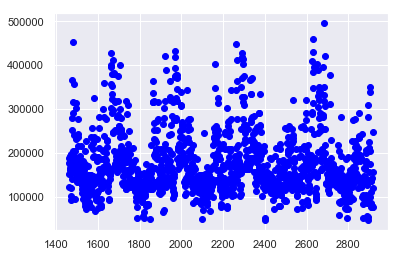

In [37]:
x = prove.Id
j = plt.scatter(x, np.exp(test_y_pred), color='blue')
# plt.legend(loc=1)
plt.show()

Improvimg results

In this section

1. Optimise results for better performance
